In [18]:
training_ds_path="/Users/vaishaalikondapalli/Desktop/Allimgs/Train"
testing_ds_path="/Users/vaishaalikondapalli/Desktop/Allimgs/Test"

In [19]:
import numpy as np
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [20]:
#model definition
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam',metrics=['accuracy'])

#used to detect feature in very tiny areas of the image.Its gonna learn a hidden pattern.As you go deeper into the layered network,
#the receptive feild of the CNN increases. So, the feature it extracts are quite a bigger part of the original picture.
#(3x3) is the standard kernel size picked

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 110, 110, 64)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [22]:
#Train from scratch
#so we'll use the keras image data generator library to make the data ready for the mode

train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,       # Rotate the image by 20 degrees
    width_shift_range=0.2,   # Shift the image horizontally
    height_shift_range=0.2,  # Shift the image vertically
    brightness_range=[0.8,1.2], # Adjust brightness
    channel_shift_range=0.2,  # Randomly shift color channels
    fill_mode='nearest'      # How to fill in new pixels after a transformation
)
test_dataset=image.ImageDataGenerator(rescale=1./255)

In [23]:
#creating actual generator function
train_generator=train_datagen.flow_from_directory(
    '/Users/vaishaalikondapalli/Desktop/Allimgs/Train',
    target_size=(224,224),
    batch_size=8,
    class_mode='categorical'
)

Found 283 images belonging to 7 classes.


In [24]:
train_generator.class_indices

{'Hello': 0,
 'Help': 1,
 'PhoneNumber': 2,
 'Please': 3,
 'Sorry': 4,
 'ThankYou': 5,
 'Water': 6}

In [25]:
#creating the validation function
validation_generator=test_dataset.flow_from_directory(
    '/Users/vaishaalikondapalli/Desktop/Allimgs/Test',
    target_size=(224,224),
    batch_size=8,
    class_mode='categorical'
)

Found 163 images belonging to 7 classes.


In [26]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=100,
    validation_data = validation_generator,
    validation_steps=2
)

/var/folders/13/p_dy58694092f9vhw3lnlmwc0000gn/T/ipykernel_54412/2018266594.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/100
8/8 [==============================] - 10s 1s/step - loss: 0.7942 - accuracy: 0.7902 - val_loss: 0.4326 - val_accuracy: 0.8571
Epoch 2/100
8/8 [==============================] - 8s 985ms/step - loss: 0.4834 - accuracy: 0.8571 - val_loss: 0.5897 - val_accuracy: 0.8571
Epoch 3/100
8/8 [==============================] - 8s 991ms/step - loss: 0.4496 - accuracy: 0.8571 - val_loss: 0.4540 - val_accuracy: 0.8571
Epoch 4/100
8/8 [==============================] - 8s 957ms/step - loss: 0.4373 - accuracy: 0.8571 - val_loss: 0.4749 - val_accuracy: 0.8571
Epoch 5/100
8/8 [==============================] - 8s 962ms/step - loss: 0.4333 - accuracy: 0.8571 - val_loss: 0.4493 - val_accuracy: 0.8571
Epoch 6/100
8/8 [==============================] - 7s 920ms/step - loss: 0.4321 - accuracy: 0.8571 - val_loss: 0.4634 - val_accuracy: 0.8571
Epoch 7/100
8/8 [==============================] - 8s 971ms/step - loss: 0.4288 - accuracy: 0.8571 - val_loss: 0.4518 - val_accuracy: 0.8571
Epoch 8/100
8/8

In [27]:
model.evaluate_generator(train_generator)

/var/folders/13/p_dy58694092f9vhw3lnlmwc0000gn/T/ipykernel_54412/326654268.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train_generator)


[0.4129108488559723, 0.857142984867096]

In [28]:
model.evaluate_generator(validation_generator)

/var/folders/13/p_dy58694092f9vhw3lnlmwc0000gn/T/ipykernel_54412/3378472596.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_generator)


[0.41261357069015503, 0.8571427464485168]

In [29]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


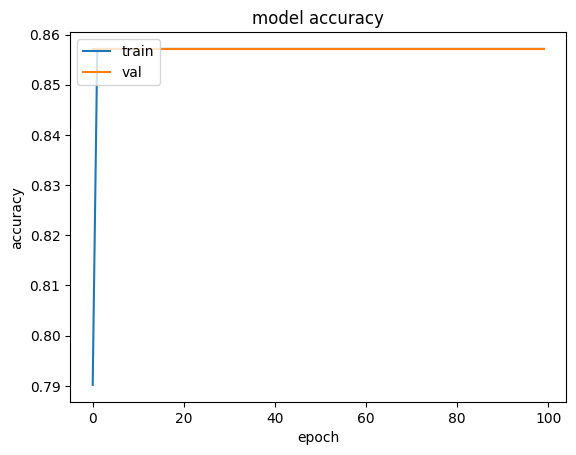

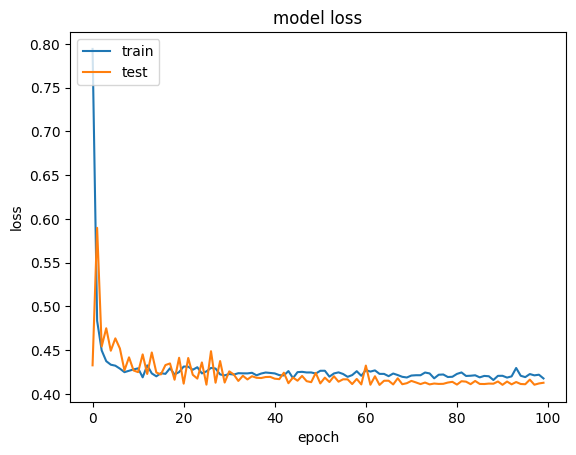

In [30]:
import matplotlib.pyplot as plt
# accuracy plot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
import numpy as np
from keras.preprocessing import image

# Load the image
img_path = '/Users/vaishaalikondapalli/Desktop/Allimgs/Test/Hello/Hello.5503eb44-54dc-11ef-8c18-d22f8fcef282.png'  # Update this to your actual image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array * 1./255  # Rescale

# Predict the class
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

# Map the predicted class index to the actual class label
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class[0]]

print(f"Predicted class: {predicted_label}")

1/1 [==============================] - 0s 79ms/step
Predicted class: Hello


In [32]:
# Load the image
img_path = '/Users/vaishaalikondapalli/Desktop/Allimgs/Test/Water/Water.a8fbde40-5654-11ef-b97a-d22f8fcef282.png'  # Update this to your actual image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array * 1./255  # Rescale

# Predict the class
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

# Map the predicted class index to the actual class label
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class[0]]

print(f"Predicted class: {predicted_label}")

1/1 [==============================] - 0s 32ms/step
Predicted class: Hello


In [33]:
# Load the image
img_path = '/Users/vaishaalikondapalli/Desktop/Allimgs/Test/ThankYou/ThankYou.886edde0-54dc-11ef-8c18-d22f8fcef282.png'  # Update this to your actual image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array * 1./255  # Rescale

# Predict the class
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

# Map the predicted class index to the actual class label
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class[0]]

print(f"Predicted class: {predicted_label}")

1/1 [==============================] - 0s 31ms/step
Predicted class: Hello
